## 13.2 Diagnostics for checking the assumptions of linear regression

As previously discussed, the linear regression model makes certain assumptions and all inferences made from a model are contingent on these assumptions being correct. It is therefore important that we have statistical techniques (or **diagnostic tools**) to investigate these assumptions. 

In practice, it is rare for all the assumptions of a statistical procedure to hold exactly. We may have evidence in the data, or prior knowledge about the data, that lead us to believe that the assumptions made by the model do not hold. This does not necessarily mean that the results from the model should be disregarded, since statistical procedures are **robust** to departures from assumptions in many settings. When conducting statistical analyses, it is a good idea to first try to establish to what extent assumptions hold and then consider whether the methods used can be adapted to improve the extent to which assumptions hold. If adaptations cannot be made, it is necessary to consider to what extent the results of an analysis can be trusted. 

In this section we largely focus on diagnostic tools that can be used to identify assumption violations. Some pointers are given to possible adaptations and alternative techniques that can be used when assumptions are violated, however issues of robustness are not considered in great detail. It is worth noting that, broadly speaking, the central limit theorem implies that departures from assumptions are less important for large datasets than for small ones, and so assumption violations are less of a concern when working with big data. 


### 13.2.1 Assumptions of the linear regression model 

The assumptions made by the linear regression model are as follows:

1. **Linearity:** There is a linear relationship between the dependent variable $Y$ and each of the independent variables. Here we are contrasting a linear relationship with a non-linear relationship, not with no relationship. A model in which one of the regression coefficients is zero can satisfy the assumptions of linear regression. 

2. **Normality:** The true residuals follow a normal distribution. 

3. **Homoscedasticity:** The true residual variance is constant i.e. the scatter of points around the true regression line has the same variance, irrespective of the value of $x_i$. The converse of this feature is termed **heteroscedasticity**. 

4. **Independence:** The observations of $y_i$ are independent. 

In this session we will focus on the first three assumptions. Violations of the independence assumption are often more apparant from the context of a study than from the data itself. For example, if we carry out a study in which the blood pressure of 100 people are each measured twice, and then treat the 200 measurements as independent in the statistical analysis it is clear that the assumption of independence is violated. 

Notice that the normality and homoscedasticity assumptions concern the *true* residuals, defined in terms of deviations from the model defined by population parameters. Since true residuals can never be observed in practice, we have to use the observed residuals (obtained by replacing the population parameters with their estimates). In fact, observed residuals are neither independent nor do they have constant variance, but in most settings the departures from independence and homoscedasticity are very small. Consequently, we can proceed as if the observed residuals were the true residuals when investigating assumptions. 

### 13.2.2 Using plots to investigate assumptions

It is a good idea to explore your data using a number of simple plots. Here we will introduce the most useful plots for both simple and multivariable linear regression models. 

#### 13.2.2.1 Scatter plots of the outcome against independent variables

For simple linear regression models, a scatter plot of the outcome against the independent variable can usually make serious violations of assumptions apparent. Such plots are particularly good for identfiying non-linearity, heteroscedasticity and **outliers** (points which lie atypically far from the regression line). 

Let our outcome and independent variable be denoted by $Y$ and $X$, respectively. The figure below depicts four different scenarios where various assumptions are violated. In Scenario A, there is a slight curvature in the scatter of points between $Y$ and $X$, suggesting a non-linear relationship which violates the linearity assumption. In Scenario B, the variance of $Y$ is larger for larger values of $X$, violating the homoscedasticity assumption. In Scenario C, the linearity and homoscedasticity assumptions appear to hold, but there is a possible outlier (circled in red). Scenario D depicts an ideal situation for simple linear regression, where there appears to be no violations. 

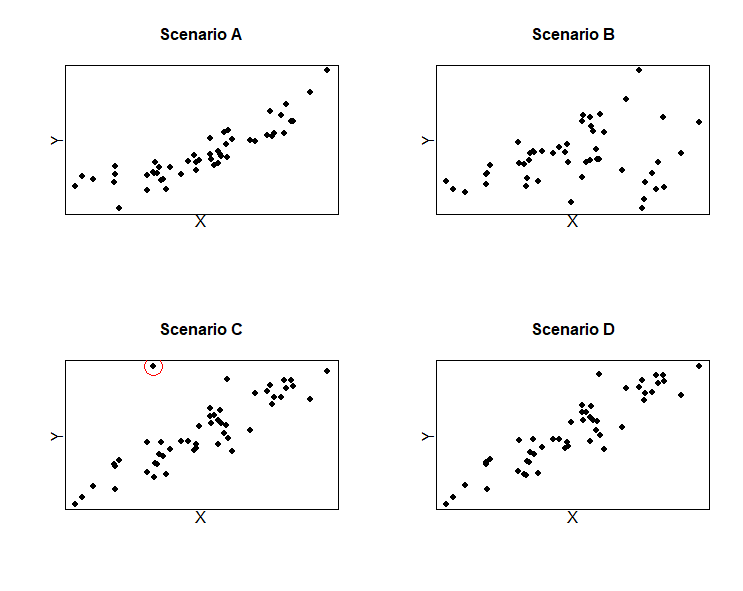

For multivariable linear regression, the linearity assumption requires that the relationship between the outcome and each independent variable is linear *conditional on the other covariates in the model*. So, there is no requirement that the relationship between the outcome and each individual covariate is linear when other covariates are ignored. This means that assessment of the fit of a multivariable linear regression cannot be inferred from a series of scatter plots relating the outcome to each covariate. Such plots can be useful for detecting points with extreme values, but the residual plots considered next are more useful for multivariable models. 

#### 13.2.2.2 Plots of residuals against fitted values or covariates

Plots of the observed residuals against the fitted values are useful for investigating the assumptions of linearity and homoscedasticity. For linearity: if a non-linear relationship is present, then the residuals will not be equally distributed above and below zero across the range of fitted values. For homoscedasticity: if there is heterogeneity in the residuals, the variance of residuals will not be constant across the range of fitted values. 

The figure below uses the same data from Scenarios A-D above, but displays the observed residuals against fitted values. We can see that linearity is violated in Scenario A, since the scatter points are not equally distributed above and below the line at $\epsilon=0$. Furthermore, in Scenario B we can see that the variance of residuals increase with increasing $\hat{y}$, indicating a violation of homoscedasticity. 


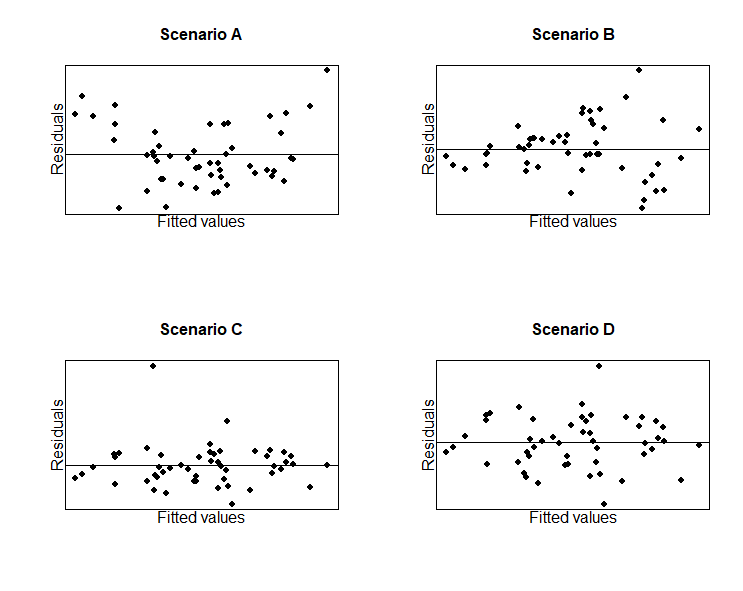

It can also be useful to plot residuals against each covariate, as a futher check for a linear relationship between $Y$ and each of the independent variables (conditional on the other covariates in the model). If there are only a small number of covariates in the model, then these plots can be done for all variables. However, if the model is very complex, it may be judged sufficient to only plot residuals against fitted values and residuals against the most important covariates. 


#### 13.2.2.3 Normal plots of residuals 

Normal plots (such as the **Q-Q plot**) provide the best means of visually detecting departures from normality. The normal Q-Q plot plots observed values against a standard normal distribution with the same number of points. If the data are perfectly normally distributed, the points on a Q-Q plot would lie on the line $Y=X$. Deviations from this line indicate deviations from normality. Q-Q plots of residuals can be used to investigate the normality assumption. 

As previously mentioned, the observed residuals do not have constant variance even when true residuals do. Therefore, some authors suggest using **standardised** residuals in the normal plots (since standardised residuals do have constant variance). On the other hand, some prefer to work with the observed residuals since these have the same units as the outcome. In practice, the differences between the two approaches are minor. 

The figure below depicts normal Q-Q plots for the standardised residuals in Scenarios A-D. In such plots we might expect to see some deviation from the straight line in the extreme values of the residuals and so the variation in the tails are not of great concern. In Scenario A however, there is deviation away from the line $Y=X$ towards the middle, indicating a violation of the normality assumption. Furthermore, the outlier in Scenario C may need further investigation (we discuss outliers further in a subsequent section). 

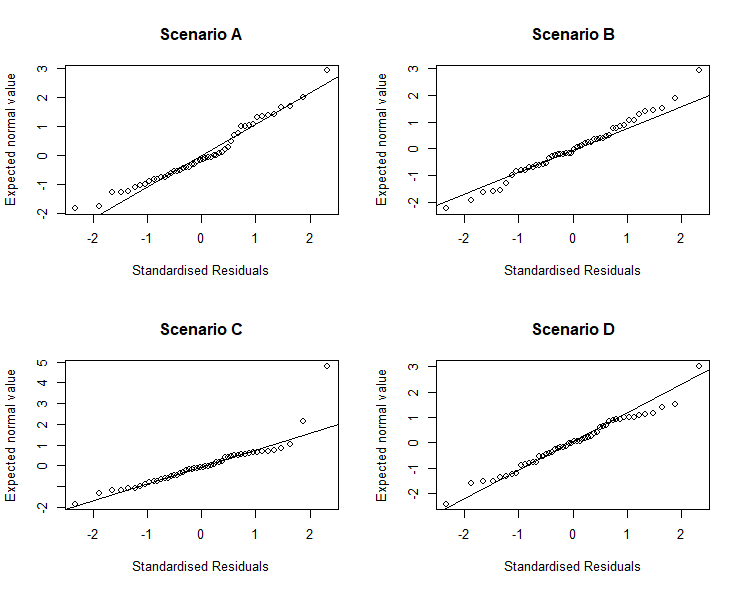

#### 13.2.2.4 Plots based on Cook's distance

Cook's distance is a measure of the **influence** of an observation. An influential observation is one that has a large impact on the model parameter estimates. It is worth checking the influence of observations, particularly potential outliers, to see if they are having a much larger impact on model fit than we would expect. 

For a model with $p$ parameters (with estimated residual variance $\sigma^2$), the Cook's distance for the $i^{th}$ observation ($D_i$) is obtained by refitting the model excluding this observation and obtaining new fitted values ($\hat{y_{j(i)}}$) for all $n$ observations (including the omitted one). $D_i$ is then defined as:

$$D_i = \frac{\sum_{i=1}^n(\hat{y}_{j(i)}-\hat{y}_i)^2}{(p+1)\hat{\sigma}^2}$$

The higher the value of $D_i$, the more influential the observation.

It can be informative to display Cook's distances graphically. The figure below plots the Cook's distances for each observation in Scenarios A-D. 

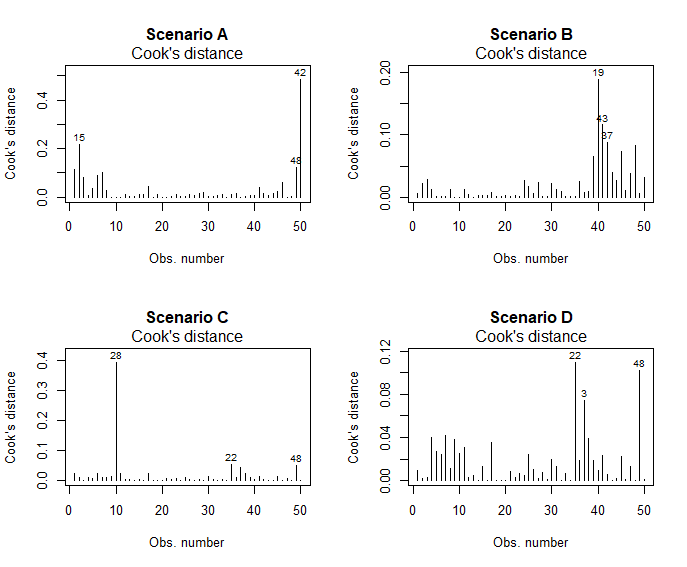

In Scenario C the outlier identified in the previous plots and potentially problematic has a much higher Cook's distance than the other observations, indicating that it is highly influential and worth further investigation. 
